In [115]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

from model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
fs = 625e6
duration = 48e-6
F_main_real=440e3

t = np.linspace(0, duration, int(duration * fs))  
U = np.sin(2 * np.pi * F_main_real * t)

In [117]:
R= 10
C= 475e-12

I= RC_transfer(t,U,R,C)

439936.31535947707


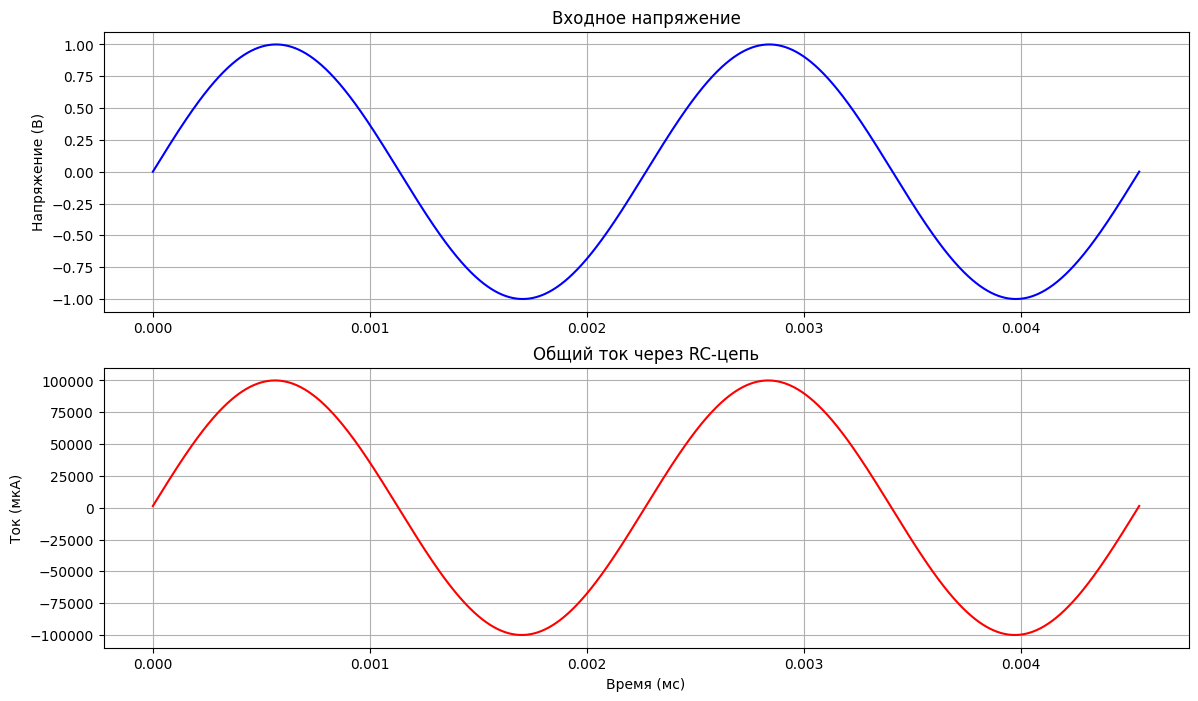

In [118]:
F,V = get_spectrum3([t,U])

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=0
for i in  t:
    if (i<T):
        T_counts+=1


window=T_counts*2


plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(t[:window] * 1e3, U[:window] , label='U(t)', color='blue')
plt.title('Входное напряжение')
plt.ylabel('Напряжение (В)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t[:window]  * 1e3, I[:window]  * 1e6, label='I_total(t)', color='red')
plt.title('Общий ток через RC-цепь')
plt.xlabel('Время (мс)')
plt.ylabel('Ток (мкА)')
plt.grid()



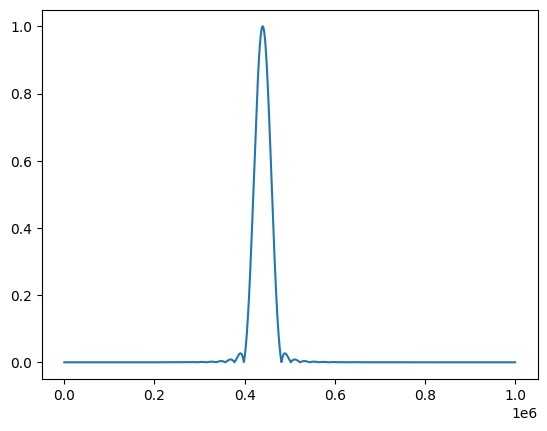

In [119]:
plt.plot(F,V)

np.float64(0.7522831587176158)

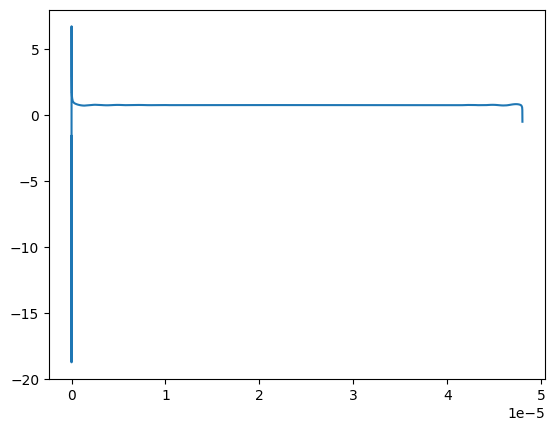

In [120]:
phase_diff=get_phase1([t,U],[t,I])

plt.plot(t,phase_diff)

phase_mean=abs(np.mean(phase_diff))

central_index=int(len(phase_diff)/2)
phase_mean=phase_diff[central_index]
phase_mean

In [121]:
# Сравнение частоты 

f_rel_real=1/(2*pi*R*C)
f_rel_real

33506303.808820073

In [ ]:
f_rel_calc_mean = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
f_rel_calc_mean

np.float64(33504717.665683296)

np.float64(33382700.84526793)

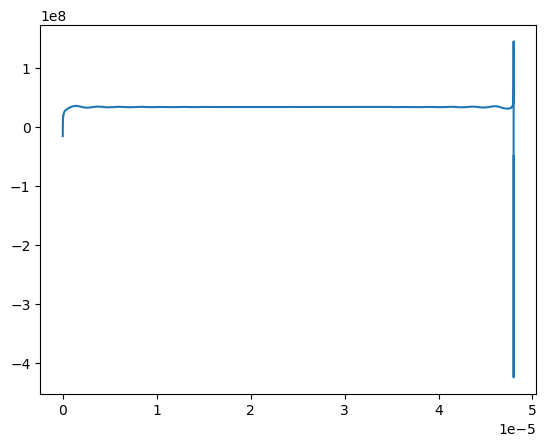

In [123]:
phase_diff = np.array(phase_diff)  # гарантируем, что это массив
f_graph = F_peak_calc * np.cos(phase_diff*0.0174533) / np.sin(phase_diff*0.0174533)

plt.plot(t,f_graph)

np.mean(f_graph)